In [ ]:
!git clone https://github.com/PacktPublishing/Python-Natural-Language-Processing-Cookbook.git

Cloning into 'Python-Natural-Language-Processing-Cookbook'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 308 (delta 36), reused 39 (delta 12), pack-reused 224 (from 1)
Receiving objects: 100% (308/308), 658.34 MiB | 19.66 MiB/s, done.
Resolving deltas: 100% (128/128), done.
Updating files: 100% (93/93), done.


In [ ]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00


In [ ]:
%cd Python-Natural-Language-Processing-Cookbook

/content/Python-Natural-Language-Processing-Cookbook


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.2881 - loss: 1.5970 - val_accuracy: 0.4410 - val_loss: 1.4548
Epoch 2/7
23/23 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.4433 - loss: 1.3372 - val_accuracy: 0.5112 - val_loss: 1.1503
Epoch 3/7
23/23 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.5943 - loss: 1.0673 - val_accuracy: 0.5702 - val_loss: 0.9932
Epoch 4/7
23/23 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.8105 - loss: 0.6739 - val_accuracy: 0.7079 - val_loss: 0.8223
Epoch 5/7
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.9319 - loss: 0.4179 - val_accuracy: 0.7669 - val_loss: 0.6087
Epoch 6/7
23/23 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.9671 - loss: 0.1764 - val_accuracy: 0.8427 - val_loss: 0.5290
Epoch 7/7
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9726 - loss: 0.1047 - val_accuracy: 0.8034 - val_loss: 0.5887
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 591ms/step - accuracy: 0.7965 - loss: 0.5601


Test set
  Loss: 0.532
  Accuracy: 0.811
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 447ms/step
               precision    recall  f1-score   support

     business       0.87      0.77      0.82       104
entertainment       0.78      0.77      0.78        75
     politics       0.76      0.83      0.79        82
        sport       0.85      0.91      0.88        99
         tech       0.78      0.76      0.77        85

     accuracy                           0.81       445
    macro avg       0.81      0.81      0.81       445
 weighted avg       0.81      0.81      0.81       445



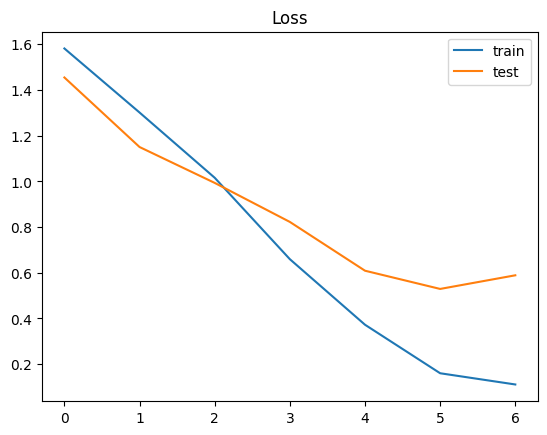

70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 571ms/step
               precision    recall  f1-score   support

     business       0.95      0.90      0.93       510
entertainment       0.92      0.92      0.92       386
     politics       0.89      0.93      0.91       417
        sport       0.94      0.98      0.96       511
         tech       0.93      0.92      0.92       401

     accuracy                           0.93      2225
    macro avg       0.93      0.93      0.93      2225
 weighted avg       0.93      0.93      0.93      2225



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
[4]
['tech']


In [ ]:
import pandas as pd
import pickle
import numpy as np
# Import Tokenizer and pad_sequences from tensorflow.keras.preprocessing instead of keras.preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt
from Chapter04.preprocess_bbc_dataset import get_data
from Chapter04.keyword_classification import get_labels
from Chapter04.preprocess_bbc_dataset import get_stopwords
from Chapter04.svm_classification import create_dataset, new_example

# ... (rest of the code remains the same) ...

MAX_NUM_WORDS = 50000
MAX_SEQUENCE_LENGTH = 1000
EMBEDDING_DIM = 300

bbc_dataset = "Chapter04/bbc-text.csv"

def evaluate(model, X_test, Y_test, le):
    Y_pred = model.predict(X_test)
    Y_pred = Y_pred.argmax(axis=-1)
    Y_test = Y_test.argmax(axis=-1)
    Y_new_pred = [le.inverse_transform([value]) for value in Y_pred]
    Y_new_test = [le.inverse_transform([value]) for value in Y_test]
    print(classification_report(Y_new_test, Y_new_pred))

def plot_model(history):
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

def create_tokenizer(input_data, save_path):
    tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
    tokenizer.fit_on_texts(input_data)
    save_tokenizer(tokenizer, save_path)
    return tokenizer

def save_tokenizer(tokenizer, filename):
    with open(filename, 'wb') as f:
        pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

def load_tokenizer(filename):
    with open(filename, 'rb') as f:
        tokenizer = pickle.load(f)
    return tokenizer

def transform_text(tokenizer, input_text):
    if (isinstance(tokenizer, str)):
        tokenizer = load_tokenizer(tokenizer)
    X_input = tokenizer.texts_to_sequences(input_text)
    X_input = pad_sequences(X_input, maxlen=MAX_SEQUENCE_LENGTH)
    return X_input

def train_model(df, le):
    tokenizer = create_tokenizer(df['text'].values, 'bbc_tokenizer.pickle')
    X = transform_text(tokenizer, df['text'].values)
    Y = pd.get_dummies(df['label']).values
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
    model = Sequential()
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.add(Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(5, activation='softmax'))
    loss='categorical_crossentropy' #Standard for multiclass classification
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    epochs = 7
    batch_size = 64
    es = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[es])
    accr = model.evaluate(X_test,Y_test)
    print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
    model.save('bbc_model_scratch1.h5')
    evaluate(model, X_test, Y_test, le)
    plot_model(history)

def load_and_evaluate_existing_model(model_path, tokenizer_path, df, le):
    model = load_model(model_path)
    tokenizer = load_tokenizer(tokenizer_path)
    X = transform_text(tokenizer, df['text'].values)
    Y = pd.get_dummies(df['label']).values
    evaluate(model, X, Y, le)

def test_new_example(model, tokenizer, le, text_input):
    X_example = transform_text(tokenizer, [new_example])
    label_array = model.predict(X_example)
    new_label = np.argmax(label_array, axis=-1)
    print(new_label)
    print(le.inverse_transform(new_label))

def main():
    data_dict = get_data(bbc_dataset)
    le = get_labels(list(data_dict.keys()))
    df = create_dataset(data_dict, le)
    train_model(df, le)
    load_and_evaluate_existing_model('bbc_model_scratch1.h5', 'bbc_tokenizer.pickle', df, le)
    model = load_model('bbc_model_scratch1.h5')
    tokenizer = 'bbc_tokenizer.pickle'
    test_new_example(model, tokenizer, le, new_example)

if (__name__ == "__main__"):
    main()